In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive (1).zip


In [ ]:
!unzip archive.zip -d /content/Waste_Classification


Streaming output truncated to the last 5000 lines.
  inflating: /content/Waste_Classification/DATASET/TRAIN/R/R_5499.jpg  
  inflating: /content/Waste_Classification/DATASET/TRAIN/R/R_55.jpg  
  inflating: /content/Waste_Classification/DATASET/TRAIN/R/R_550.jpg  
  inflating: /content/Waste_Classification/DATASET/TRAIN/R/R_5500.jpg  
  inflating: /content/Waste_Classification/DATASET/TRAIN/R/R_5501.jpg  
  inflating: /content/Waste_Classification/DATASET/TRAIN/R/R_5502.jpg  
  inflating: /content/Waste_Classification/DATASET/TRAIN/R/R_5503.jpg  
  inflating: /content/Waste_Classification/DATASET/TRAIN/R/R_5504.jpg  
  inflating: /content/Waste_Classification/DATASET/TRAIN/R/R_5505.jpg  
  inflating: /content/Waste_Classification/DATASET/TRAIN/R/R_5506.jpg  
  inflating: /content/Waste_Classification/DATASET/TRAIN/R/R_5507.jpg  
  inflating: /content/Waste_Classification/DATASET/TRAIN/R/R_5508.jpg  
  inflating: /content/Waste_Classification/DATASET/TRAIN/R/R_5509.jpg  
  inflating: /co

In [ ]:
import tensorflow as tf
print("GPU available:", tf.config.list_physical_devices('GPU'))


GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 16

train_path = "/content/Waste_Classification/DATASET/TRAIN"
test_path = "/content/Waste_Classification/DATASET/TEST"

# Training & Validation (80/20 split)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Load MobileNetV2 base model
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False  # Freeze base

# Add classification head
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(2, activation='softmax')  # 2 output classes
])

# Compile
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
EPOCHS = 10

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 278s 238ms/step - accuracy: 0.6856 - loss: 0.6386 - val_accuracy: 0.9140 - val_loss: 0.2273
Epoch 2/10
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 266s 235ms/step - accuracy: 0.8748 - loss: 0.3049 - val_accuracy: 0.9282 - val_loss: 0.2005
Epoch 3/10
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 280s 248ms/step - accuracy: 0.8933 - loss: 0.2599 - val_accuracy: 0.9286 - val_loss: 0.1947
Epoch 4/10
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 258s 229ms/step - accuracy: 0.9075 - loss: 0.2379 - val_accuracy: 0.9324 - val_loss: 0.1878
Epoch 5/10
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 258s 228ms/step - accuracy: 0.9078 - loss: 0.2324 - val_accuracy: 0.9377 - val_loss: 0.1788
Epoch 6/10
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 256s 227ms/step - accuracy: 0.9169 - loss: 0.2168 - val_accuracy: 0.9295 - val_loss: 0.1909
Epoch 7/10
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 263s 233ms/step - accuracy: 0.9139 - loss: 0.2233 - val_accuracy: 0.9340 - val_loss: 0.1827
Epoch 8/10
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 294s 260ms/step - ac

In [ ]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc*100:.2f}%")


158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.8586 - loss: 0.3079
Test Accuracy: 86.23%


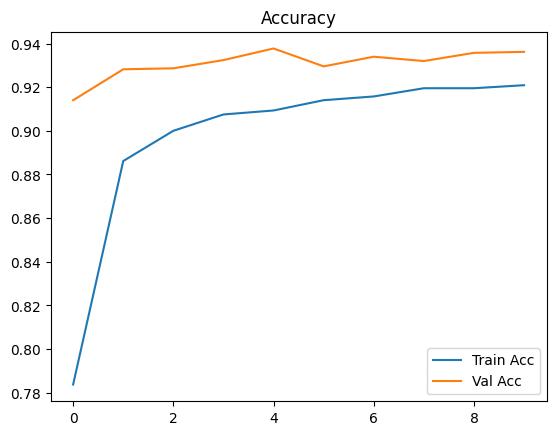

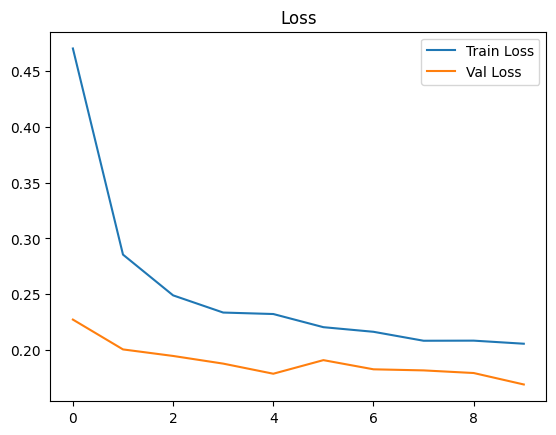

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()


158/158 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step
Classification Report:

              precision    recall  f1-score   support

           O       0.54      0.64      0.59      1401
           R       0.42      0.33      0.37      1112

    accuracy                           0.50      2513
   macro avg       0.48      0.48      0.48      2513
weighted avg       0.49      0.50      0.49      2513



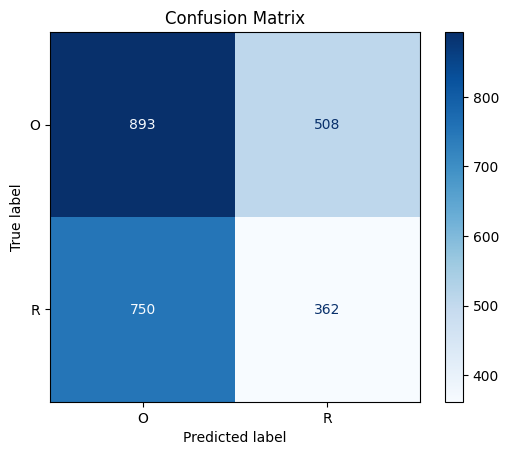

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions and true labels
test_generator.reset()
preds = model.predict(test_generator, verbose=1)
y_pred = np.argmax(preds, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Saving Greens-webp.webp to Greens-webp.webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


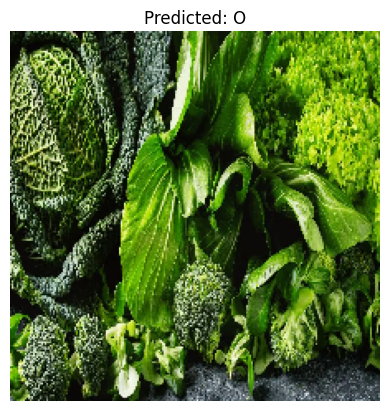

In [ ]:
from google.colab import files
uploaded = files.upload()

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Get the filename
img_path = list(uploaded.keys())[0]

# Load and preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize

# Predict
pred = model.predict(img_array)
pred_class = np.argmax(pred, axis=1)[0]
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[pred_class]

# Display result
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_label}")
plt.show()


In [ ]:
model.save("waste_model.h5")